In [1]:
%matplotlib inline
import os
from tomato.joint.completeanalyzer import CompleteAnalyzer
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 8)


In [2]:
# score input
symbtr_name = 'ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede'
txt_score_filename = os.path.join(symbtr_name, symbtr_name + '.txt')
mu2_score_filename = os.path.join(symbtr_name, symbtr_name + '.mu2')

# audio input
audio_mbid = 'f970f1e0-0be9-4914-8302-709a0eac088e'
audio_filename = os.path.join(symbtr_name, audio_mbid, audio_mbid + '.mp3')

# instantiate
completeAnalyzer = CompleteAnalyzer()


- Automatic phrase segmentation on the SymbTr-txt file: ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.txt
  The call took 10.75 seconds to execute.
- Extracting (meta)data from the SymbTr-txt file: ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.txt
  The call took 1.55 seconds to execute.
- Extracting metadata from the SymbTr-mu2 file: ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.mu2
  The call took 0.01 seconds to execute.
- Getting relevant metadata of f970f1e0-0be9-4914-8302-709a0eac088e
  The call took 3.29 seconds to execute.
- Extracting predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 35.28 seconds to execute.
- Filtering predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be

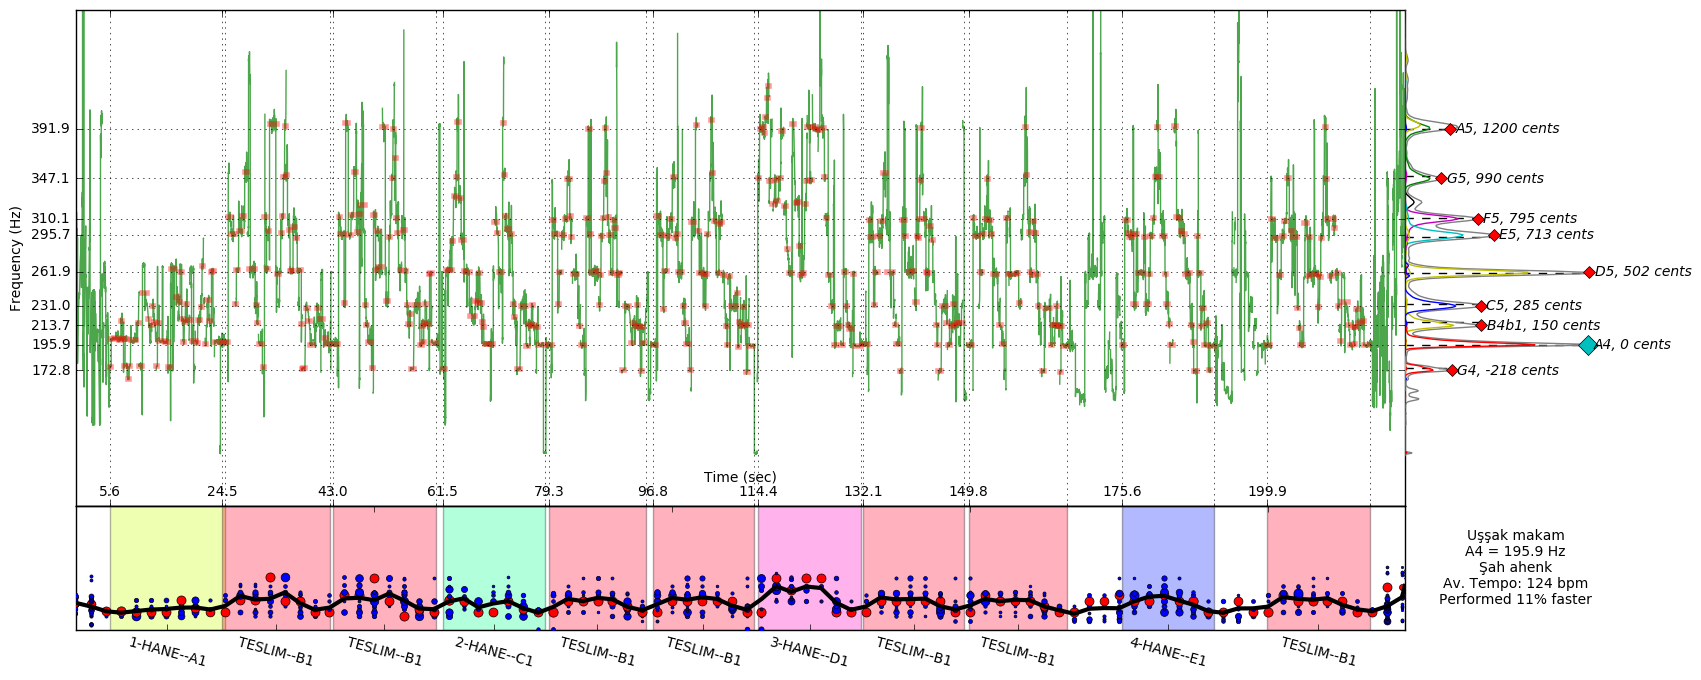

In [3]:
# Apply the complete analysis. The output tuple will have (summarized_features, 
# score_features, audio_features, score_informed_audio_features, joint_features) in order
complete_features = completeAnalyzer.analyze(
    symbtr_txt_filename=txt_score_filename, symbtr_mu2_filename=mu2_score_filename,
    symbtr_name=symbtr_name, audio_filename=audio_filename, audio_metadata=audio_mbid)

# plot the summarized features
fig, ax = completeAnalyzer.plot(complete_features[0])
ax[0].set_ylim([50, 500])
matplotlib.pyplot.show()


... or you can use the single line call "analyze" of each analyzer object. The procedure below does all the analysis for the given audio and score pair.

In [4]:
from tomato.audio.audioanalyzer import AudioAnalyzer
from tomato.symbolic.symbtranalyzer import SymbTrAnalyzer
from tomato.joint.jointanalyzer import JointAnalyzer

# instantiate analyzer objects
scoreAnalyzer = SymbTrAnalyzer(verbose=True)
audioAnalyzer = AudioAnalyzer(verbose=True)
jointAnalyzer = JointAnalyzer(verbose=True)

# score analysis
score_features, boundaries, work_mbid = scoreAnalyzer.analyze(
    txt_score_filename, mu2_score_filename, symbtr_name=symbtr_name)

# audio analysis
audio_features = audioAnalyzer.analyze(
    audio_filename, makam=score_features['makam']['symbtr_slug'])

# joint analysis
joint_features, score_informed_audio_features = jointAnalyzer.analyze(
    txt_score_filename, score_features, audio_filename, audio_features['pitch'])

# redo some steps in audio analysis
score_informed_audio_features = audioAnalyzer.analyze(
    metadata=False, pitch=False, **score_informed_audio_features)

# summarize all the features extracted from all sources
summarized_features = jointAnalyzer.summarize(
    audio_features, score_features, joint_features, score_informed_audio_features)


- Automatic phrase segmentation on the SymbTr-txt file: ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.txt
  The call took 9.05 seconds to execute.
- Extracting (meta)data from the SymbTr-txt file: ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.txt
  The call took 2.12 seconds to execute.
- Extracting metadata from the SymbTr-mu2 file: ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.mu2
  The call took 0.01 seconds to execute.
- Getting relevant metadata of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 2.29 seconds to execute.
- Extracting predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 35.76 seconds to execute.
- Filt